# Introduction

### Les conditions de travail comme les horaires ou l'environnement de travail (stress, irritations, douleurs, inconfort, etc.).
### C'est  l'ensemble des facteurs sociaux, psychologiques, environnementaux, organisationnels et physiques 
### qui influence directement la qualitite de service et des produits 

# Objectif


### Révéler l'mage associée a l'entite MacDonald France de perspective des employés

# Corpus


###  reviews des different employees qui ont travaillé ou encore en court

## 1) Data Preprocessing

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('scraping70k.csv', engine='python')
reviews = df[['Points positifs','Points négatifs']]
reviews.dropna(axis=0,inplace=True)
reviews.reset_index(inplace=True)
reviews.drop('index',axis = 1,inplace=True)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3]:
reviews

,Points positifs,Points négatifs
0,"Polyvalence, évolution dans plusieurs capacité","Stresse, clients méchants, horaires pas forcém..."
1,Salaire de nuit,Rythme
2,les liens que l’on peux crée,le salaire; le nombre d’heure jamais respecté ...
3,"Adrénaline, possibilité d’évolution.","Horaire, salaire."
4,Procédures / Évolution,Stress
...,...,...
15391,REPAS GRATUIT,SALAIRE TRÈS BAS
15392,"Polyvalence, évolution dans plusieurs capacité","Stresse, clients méchants, horaires pas forcém..."
15393,Salaire de nuit,Rythme
15394,les liens que l’on peux crée,le salaire; le nombre d’heure jamais respecté ...


## Preparation du dataset pour entrainenemt du model deeplearning basé sur word Embedding

In [116]:
data1 = pd.DataFrame()
data2 = pd.DataFrame()
data1['review'] = reviews['Points positifs']
data2['review'] = reviews['Points négatifs']
data1.drop_duplicates('review',inplace=True)
data2.drop_duplicates('review',inplace=True)
data1['polarity']=1
data2['polarity']=0
data = pd.concat([data1,data2])

In [117]:
data = data.sample(frac=1).reset_index(drop=True)
low = lambda x: x.lower()
data.review = data.review.apply(low)
data

,review,polarity
0,"cdi, polyvalence, autonomie, beaucoup de monde",1
1,pas assez de reconnaissance.,0
2,une télé en salle de pause.,1
3,le cdi,1
4,certains employés n'ont pas un comportement pr...,0
...,...,...
3164,trop loin de mon habitation,0
3165,"les horaires, ma vie sociale était réduite à n...",0
3166,travail d'équipe,1
3167,horaires variables,0


### dataset final: pour chaque review correspond ça polarite: 1 positive et 0 negative

In [7]:
import keras
keras.__version__


Using TensorFlow backend.


'2.3.1'

## Data cleaning ( Tokenization + stop words + ..)

In [9]:
doc = [content for content in data.review ]

In [10]:
from keras.preprocessing.text import text_to_word_sequence

doc_sequenced = [text_to_word_sequence(content)  for content in doc]

In [19]:
doc_sequenced[0:2]

[['lieux', 'de', 'travail', 'excentré'],
 ['repas', 'gratuits', 'et', 'bonne', 'équipe', 'de', 'cuisine']]

In [15]:
from nltk.corpus import stopwords
from stop_words import get_stop_words

nltk_stop_wds = stopwords.words('french')
get_stop_wds = get_stop_words('fr')
all_stop_words = list(set(nltk_stop_wds + get_stop_wds))

In [16]:
doc_list = [[token for token in content if token not in all_stop_words and len(token) > 3] for content in doc_sequenced]


In [126]:
doc_list[0:2]

[['lieux', 'travail', 'excentré'],
 ['repas', 'gratuits', 'bonne', 'équipe', 'cuisine']]

## Regroupement des review pour appliquer keras One_hot

In [21]:
doc_list_again = [' '.join(token) for token in doc_list] 

In [23]:
all_words = [token for content in doc_list for token in content]
length = len(all_words)


In [24]:
from keras.preprocessing.text import one_hot

doc_one_hot = [one_hot(token, (length*1.25)) for token in doc_list_again ]

## chercher le plus long review

In [26]:
search_lenth = [len(token) for token in doc_one_hot]

In [27]:
max(search_lenth)

37

## appliquer pad_sequences pour replire les court review avec des 0

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = max(search_lenth)
padded_docs = pad_sequences(doc_one_hot, maxlen=max_length, padding='post')


In [31]:
padded_docs[0:2]

array([[ 2764,  3335, 11086,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [  228, 10748,  4509,  9253,  2045,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]], dtype=int32)

In [118]:
labels = list(data.polarity)

In [127]:
lenth_words = len([token for content in doc_list for token in content])

In [129]:
lenth_words

9718

In [133]:
padded_docs.shape

(3169, 37)

## Implimentation du model

In [32]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Flatten

In [220]:
x_val = padded_docs[:1000]
partial_x_train = padded_docs[1000:]
y_val = labels[:1000]
partial_y_train = labels[1000:]

In [147]:
model = Sequential()
model.add(Embedding(20000, 16, input_length=37))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 37, 16)            320000    
_________________________________________________________________
flatten_9 (Flatten)          (None, 592)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               303616    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 755,201
Trainable params: 755,201
Non-trainable params: 0
_________________________________________________________________
None


In [228]:
model.fit(padded_docs, labels, epochs=30, verbose=1)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Epoch 1/30
3169/3169 [==============================] - 2s 569us/step - loss: 0.1291 - accuracy: 0.9236
Epoch 2/30
3169/3169 [==============================] - 2s 553us/step - loss: 0.1305 - accuracy: 0.9262
Epoch 3/30
3169/3169 [==============================] - 2s 569us/step - loss: 0.1316 - accuracy: 0.9243
Epoch 4/30
3169/3169 [==============================] - 2s 566us/step - loss: 0.1366 - accuracy: 0.9202
Epoch 5/30
3169/3169 [==============================] - 2s 554us/step - loss: 0.1404 - accuracy: 0.9240
Epoch 6/30
3169/3169 [==============================] - 2s 563us/step - loss: 0.1483 - accuracy: 0.9198
Epoch 7/30
3169/3169 [==============================] - 2s 559us/step - loss: 0.1322 - accuracy: 0.9221
Epoch 8/30
3169/3169 [==============================] - 2s 573us/step - loss: 0.1301 - accuracy: 0.9243
Epoch 9/30
3169/3169 [==============================] - 2s 587us/step - loss: 0.1262 - accuracy: 0.9277
Epoch 10/30
3169/3169 [==============================] - 2s 564u

In [229]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

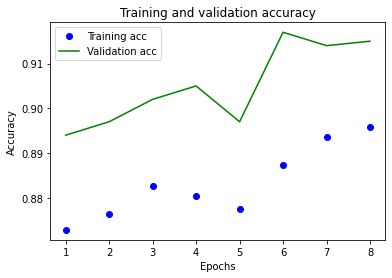

In [230]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

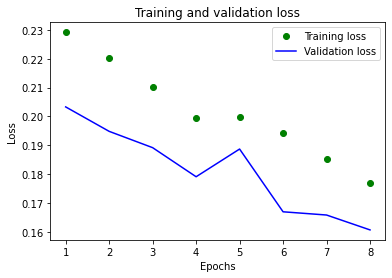

In [231]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## fonction de prediction

In [278]:
def samplePredict(text):
    onehot = one_hot(text, (length*1.25))
    padd = pad_sequences([onehot], maxlen=max_length, padding='post')
    return model.predict_classes(padd)[0][0]

    

# Extraction des aspects

In [36]:
positive = data1.copy()
negative = data2.copy()

In [303]:
positive = pd.DataFrame(positive.review.apply(round1))
negative = pd.DataFrame(negative.review.apply(round1))
reviews = pd.DataFrame(data_clean.review.apply(round1))

In [304]:
from nltk.tokenize import word_tokenize
positive_doc =  [word_tokenize(content) for content in positive['review']]
negative_doc =  [word_tokenize(content) for content in negative['review']]
reviews_doc =  [word_tokenize(content) for content in reviews['review']]


In [42]:
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
lemmatizer = FrenchLefffLemmatizer()
positive_lemmatized = [[lemmatizer.lemmatize(token,'v') for token in content] for content in positive_doc ]
negative_lemmatized = [[lemmatizer.lemmatize(token,'v') for token in content] for content in negative_doc ]

In [315]:
from nltk.corpus import stopwords
from stop_words import get_stop_words

nltk_stop_wds = stopwords.words('french')
get_stop_wds = get_stop_words('fr')
all_stop_words = list(set(nltk_stop_wds + get_stop_wds))
positive_final = [[token for token in content if token not in all_stop_words and token.isalpha() and len(token) > 3] for content in positive_lemmatized]
negative_final = [[token for token in content if token not in all_stop_words and token.isalpha() and len(token) > 3] for content in negative_lemmatized]
reviews_final = [[token for token in content if token not in all_stop_words and token.isalpha() and len(token) > 4] for content in reviews_doc]



In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud


<Figure size 432x288 with 0 Axes>

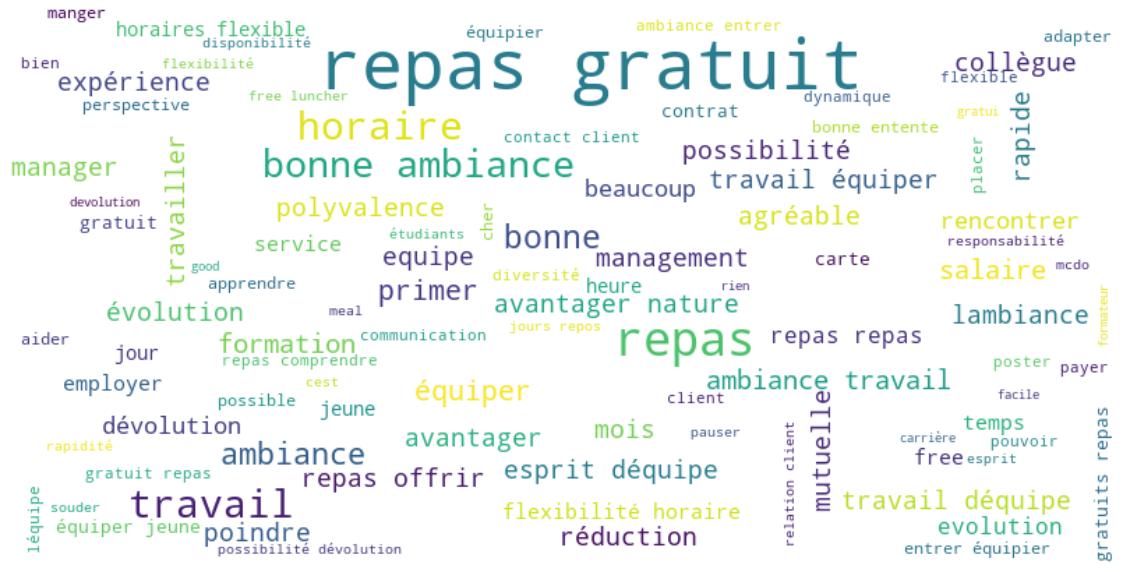

In [62]:
allwords = ' '.join([token for content in positive_final for token in content])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",width=800, height=400).generate(allwords)
plt.figure()
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

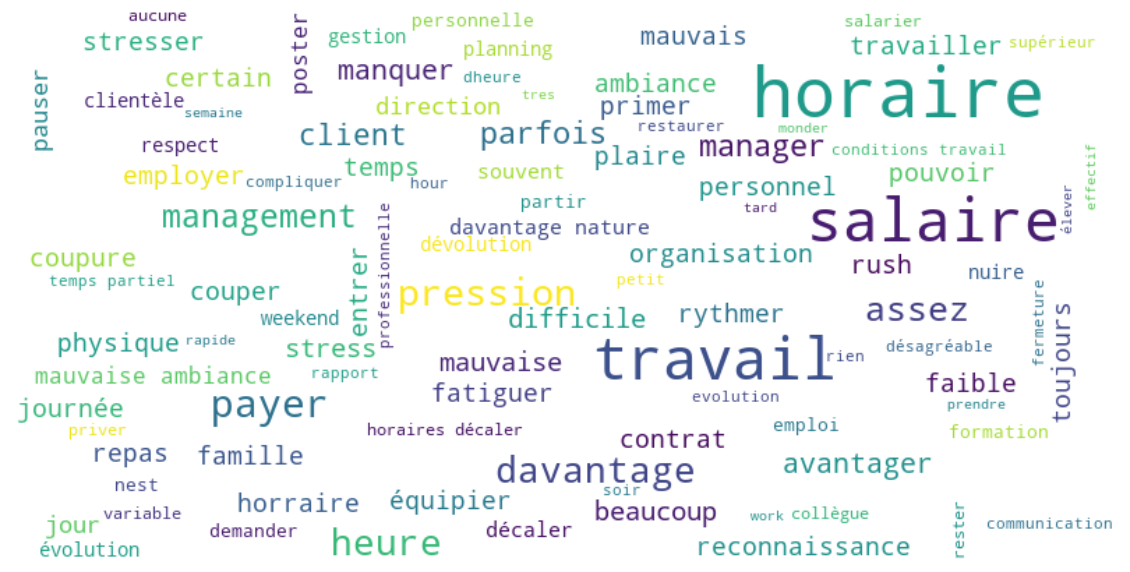

In [63]:
allwords = ' '.join([token for content in negative_final for token in content])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",width=800, height=400).generate(allwords)
plt.figure()
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [70]:
positive_finall = [content for content in positive_final if content != []]

In [74]:
from gensim import corpora
import gensim
dictionary = corpora.Dictionary(positive_finall)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in positive_finall]
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=3,
                random_state=100,
                chunksize=1000,
                passes=50)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.092233  0.220760       1        1  50.607002
0      0.116901 -0.186447       2        1  28.152189
1     -0.209134 -0.034313       3        1  21.240808, topic_info=         Term        Freq       Total Category  logprob  loglift
18      repas  399.000000  399.000000  Default  30.0000  30.0000
17    gratuit  160.000000  160.000000  Default  29.0000  29.0000
14   ambiance  119.000000  119.000000  Default  28.0000  28.0000
35   gratuits  117.000000  117.000000  Default  27.0000  27.0000
39      bonne  105.000000  105.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
29    équiper   11.648632   56.868549   Topic3  -4.3937  -0.0363
67   possible    5.390046    8.634941   Topic3  -5.1644   1.0780
15    déquipe    9.724561   42.517807   Topic3  -4.5743   0.0740
91    poindre    5.961970   15.816973   Topic3  -5.0635   0.5736
112   service    4.768585   10.972003   Topic3  -5.2869   0.7159

[149 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
105       3  0.824428  adaptation
145       1  0.943001    agréable
40        2  0.931415       aider
14        1  0.996258    ambiance
48        2  0.957906   apprendre
...     ...       ...         ...
29        2  0.263766     équiper
29        3  0.211013     équiper
27        1  0.954176   équipiers
266       3  0.908088   étudiants
3         3  0.985029   évolution

[133 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

# Pour les avis positive, 3 aspects sont clairement revelés:
## 1- les atous pour quelqu'un qui travail a Mcdo: les repas gratuits, prime 
## 2- les contact et les relations avec les colleges ou les client
## 3- chance d'experience et d'evolution

In [79]:
negative_finall = [content for content in negative_final if content != []]

In [84]:
from gensim import corpora
import gensim
dictionary2 = corpora.Dictionary(negative_finall)
doc_term_matrix2 = [dictionary2.doc2bow(rev) for rev in negative_finall]
LDA = gensim.models.ldamodel.LdaModel
lda_model2 = LDA(corpus=doc_term_matrix2,
                id2word=dictionary2,
                random_state=100,
                num_topics=2,
                chunksize=1000,
                passes=50)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.009262 -0.163458       1        1  53.700584
0      0.009262  0.163458       2        1  46.299408, topic_info=          Term        Freq       Total Category  logprob  loglift
7      travail  171.000000  171.000000  Default  30.0000  30.0000
3     horaires  168.000000  168.000000  Default  29.0000  29.0000
5      salaire  134.000000  134.000000  Default  28.0000  28.0000
40    pression   41.000000   41.000000  Default  27.0000  27.0000
152    manquer   38.000000   38.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
375  difficile   16.342815   17.232201   Topic2  -4.9995   0.7170
99        rien   11.338850   11.982249   Topic2  -5.3650   0.7148
14     horaire   34.564293   67.596680   Topic2  -4.2505   0.0993
0      clients   19.271017   28.241764   Topic2  -4.8347   0.3878
32       payer   11.899792   48.993023   Topic2  -5.3168  -0.6451

[102 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
126       1  0.993993    ambiance
25        1  0.994425       assez
167       2  0.989208      aucune
108       2  0.988104   avantager
331       1  0.043024    beaucoup
...     ...       ...         ...
62        1  0.969626       temps
62        2  0.022037       temps
7         1  0.995732     travail
7         2  0.005823     travail
63        2  0.978779  travailler

[91 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

# Pour les avis negative, 2 aspects sont clairement revelés:
## 1- pression et stresse
## 2- les horaires et les salaires

# Testons notre MODEL: comparaison avec textBlob

## With textBlob

In [92]:
df = pd.read_csv('scraping.csv',engine='python')
df.drop_duplicates('review',inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['Unnamed: 0','index'], inplace=True)
df.dropna(axis=0,inplace=True)
data_clean = pd.DataFrame(df.review.apply(round1))


In [98]:
data_clean.iloc[0][0]

'attention au personne en difficulté emploie physique mais pas sorcier'

In [102]:
TextBlob('repas gratuits, bonne ambiance et bon respect', pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0]

0.5

In [103]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from textblob import Blobber

tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
pol = lambda x: TextBlob(x, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0]
sub = lambda x: TextBlob(x, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[1]



In [105]:
data = pd.DataFrame()

In [109]:
data['polarity'] = data_clean['review'].apply(pol)
data['subjectivity'] = data_clean['review'].apply(sub)
data


,polarity,subjectivity
72,0.800000,0.000000
76,0.850000,0.850000
106,0.000000,0.000000
123,0.299286,0.478571
127,0.000000,0.200000
...,...,...
5997,0.316667,0.333333
6007,0.100909,0.175455
6014,0.150000,0.100000
6016,0.093684,0.414737


In [110]:
pos = data[data.polarity >0].count().sum()
neg = data[data.polarity <0].count().sum()
net = data[data.polarity ==0].count().sum()

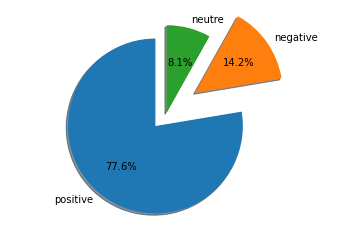

In [111]:

labels = 'positive', 'negative', 'neutre'
sizes = [pos, neg, net]
explode = (0.2, 0.4, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax1.axis('equal')  
plt.show()

## Avec Notre model

In [321]:
for_prediction = [content for content in reviews_final if len(content)<38]

In [323]:
for_prediction_finall = [' '.join(token) for token in for_prediction] 

In [ ]:
samplePredict()

In [325]:
result = [samplePredict(token) for token in for_prediction_finall]

In [328]:
result1 = [content for content in result if content ==1]
result0 = [content for content in result if content ==0]

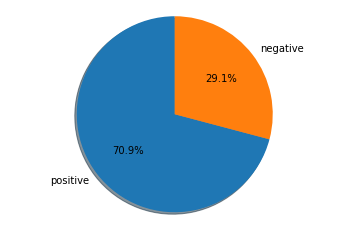

In [344]:
labels = 'positive', 'negative'
sizes = [result1, result0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax1.axis('equal')  
plt.show()